# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install seaborn
import seaborn as sns

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date', parse_dates=['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
df = df[df['value'] >= df['value'].quantile(0.025)]
df = df[df['value'] <= df['value'].quantile(0.975)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

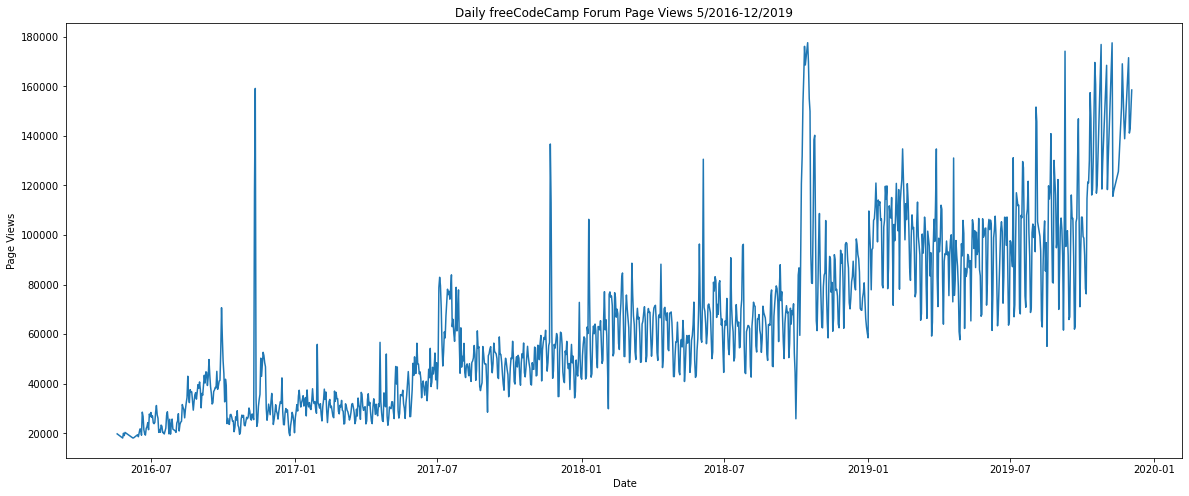

In [4]:
fig, ax = plt.subplots(figsize=(20,8))

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

sns.lineplot(data=df, x="date", y="value")

In [5]:
df = df.reset_index()
df

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1234,2019-11-24,138875
1235,2019-11-29,171584
1236,2019-11-30,141161
1237,2019-12-01,142918


In [6]:
df_bar = df
df_bar['year']= pd.DatetimeIndex(df_bar['date']).year
df_bar['month']= pd.DatetimeIndex(df_bar['date']).month_name()
df_bar

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1234,2019-11-24,138875,2019,November
1235,2019-11-29,171584,2019,November
1236,2019-11-30,141161,2019,November
1237,2019-12-01,142918,2019,December


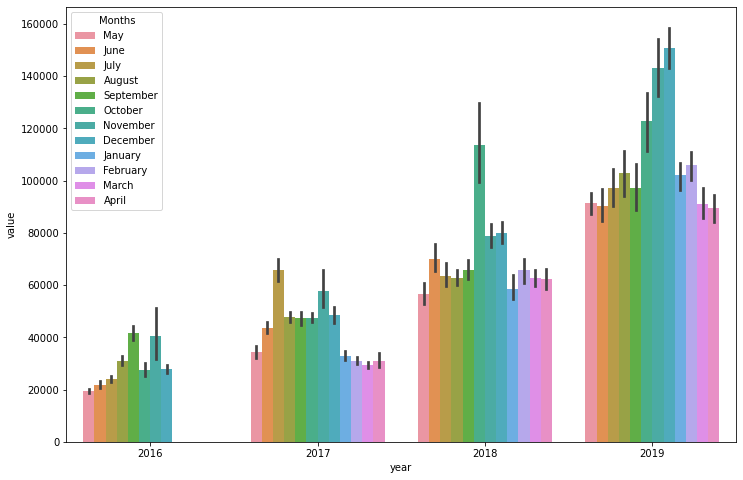

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')


sns.barplot(x='year', y='value', data = df_bar, hue='month')
ax.legend(title = 'Months')

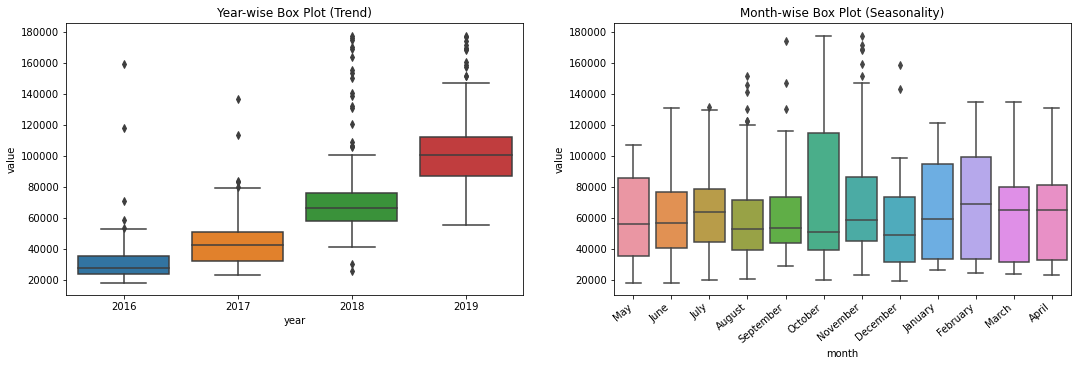

In [36]:
fig, ax = plt.subplots(figsize=(18,5))

plt.subplot(1, 2, 1)

plt.title('Year-wise Box Plot (Trend)')
sns.boxplot(x='year', y='value', data = df_bar)

plt.subplot(1, 2, 2)

plt.title('Month-wise Box Plot (Seasonality)')
ax = sns.boxplot(x='month', y='value', data = df_bar)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()